In [70]:
import numpy as np
import pandas as pd
import lifelines as ll

In [71]:
import numpy as np
import pandas as pd
import lifelines as ll

# Plotting helpers
from IPython.display import HTML
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls   
from plotly.graph_objs import *

from pylab import rcParams
rcParams['figure.figsize']=10, 5


In [72]:
from lifelines.datasets import load_waltons
df = load_waltons() # returns a Pandas DataFrame

print(df.head())

      T  E    group
0   6.0  1  miR-137
1  13.0  1  miR-137
2  13.0  1  miR-137
3  13.0  1  miR-137
4  19.0  1  miR-137


In [73]:
T = df['T']
E = df['E']

print(T)

0       6.0
1      13.0
2      13.0
3      13.0
4      19.0
5      19.0
6      19.0
7      26.0
8      26.0
9      26.0
10     26.0
11     26.0
12     33.0
13     33.0
14     47.0
15     62.0
16     62.0
17      9.0
18      9.0
19      9.0
20     15.0
21     15.0
22     22.0
23     22.0
24     22.0
25     22.0
26     29.0
27     29.0
28     29.0
29     29.0
       ... 
133    69.0
134    38.0
135    38.0
136    45.0
137    45.0
138    45.0
139    45.0
140    45.0
141    45.0
142    45.0
143    45.0
144    45.0
145    45.0
146    53.0
147    53.0
148    53.0
149    53.0
150    53.0
151    60.0
152    60.0
153    60.0
154    60.0
155    60.0
156    60.0
157    60.0
158    60.0
159    60.0
160    60.0
161    60.0
162    66.0
Name: T, Length: 163, dtype: float64


<lifelines.KaplanMeierFitter>
AxesSubplot(0.125,0.125;0.775x0.755)


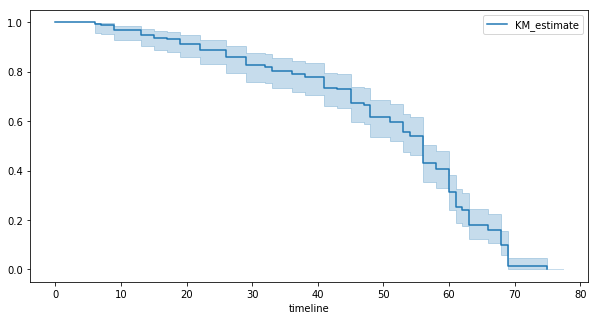

In [74]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
print(kmf)
kmf.fit(T, event_observed=E)  # or, more succiently, kmf.fit(T, E)
km_data=kmf.survival_function_

kmf.survival_function_
kmf.median_
a = kmf.plot()
print(a)

In [22]:
confidence = kmf.confidence_interval_
upper = confidence.iloc[:,0].tolist()
lower = confidence.iloc[:,1].tolist()
print(upper)
print(lower)

[nan, 0.9991335232818397, 0.9969171244598185, 0.9870680842317412, 0.9750309911698033, 0.9663424251606045, 0.961853331840505, 0.9479303549213415, 0.9285426285827516, 0.9033358984288105, 0.8773128137072396, 0.8720265451781428, 0.8560234675720562, 0.8452428813253019, 0.8343794818554625, 0.7957699131274796, 0.7901857111612299, 0.7392432085214612, 0.733466285970835, 0.6867652305478503, 0.6690395253022965, 0.6272510669615949, 0.6152039949608703, 0.5046796092328876, 0.4796010641541806, 0.38375862020448953, 0.3236878605636654, 0.30956115978785725, 0.24475909712755606, 0.22263862396419273, 0.15415682218854146, 0.046183697525073696, 0.0]
[nan, 0.9572536591090658, 0.9518341271773085, 0.9276127862113859, 0.9038208573639959, 0.8884373147604712, 0.8808654258570621, 0.8585492594417107, 0.8295467319043238, 0.794213194951949, 0.7596693986837444, 0.7528405446867344, 0.732496108893635, 0.7190437448285333, 0.7056735521659415, 0.6594637527831473, 0.6529309587834328, 0.5948249410378892, 0.5883709528834424, 

In [75]:
print(km_data)
print(type(km_data))

          KM_estimate
timeline             
0.0          1.000000
6.0          0.993865
7.0          0.987730
9.0          0.969210
13.0         0.950690
15.0         0.938344
17.0         0.932170
19.0         0.913650
22.0         0.888957
26.0         0.858090
29.0         0.827224
32.0         0.821051
33.0         0.802531
36.0         0.790184
38.0         0.777837
41.0         0.734624
43.0         0.728451
45.0         0.672891
47.0         0.666661
48.0         0.616817
51.0         0.598125
53.0         0.554512
54.0         0.542051
56.0         0.429903
58.0         0.404981
60.0         0.311524
61.0         0.254305
62.0         0.240921
63.0         0.180690
66.0         0.160614
68.0         0.100384
69.0         0.014341
75.0         0.000000
<class 'pandas.core.frame.DataFrame'>


In [26]:
df_data = pd.read_csv('km_data.csv', sep="\t")
time_list = df_data["timeline"].tolist()
proportions_list = df_data["KM_estimate"].tolist()
# assign column names
print(time_list)
print(proportions_list)

[0.0, 6.0, 7.0, 9.0, 13.0, 15.0, 17.0, 19.0, 22.0, 26.0, 29.0, 32.0, 33.0, 36.0, 38.0, 41.0, 43.0, 45.0, 47.0, 48.0, 51.0, 53.0, 54.0, 56.0, 58.0, 60.0, 61.0, 62.0, 63.0, 66.0, 68.0, 69.0, 75.0]
[1.0, 0.9938650306748462, 0.9877300613496934, 0.9692101226993866, 0.9506901840490806, 0.9383435582822092, 0.9321702453987734, 0.9136503067484664, 0.8889570552147245, 0.8580904907975462, 0.8272239263803682, 0.8210506134969329, 0.8025306748466259, 0.7901840490797547, 0.7778374233128837, 0.7346242331288348, 0.7284509202453994, 0.6728911042944786, 0.6666606311065664, 0.6168168456032719, 0.5981254260395363, 0.5545121137241534, 0.5420511673483299, 0.42990264996591704, 0.40498075721426935, 0.3115236593955919, 0.25430502807803423, 0.24092055291603245, 0.18069041468702435, 0.16061370194402164, 0.10038356371501353, 0.0143405091021448, 0.0]


In [50]:
import numpy as np
from collections import OrderedDict
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool

x = time_list
y = proportions_list
upperband = upper
lowerband = lower

band_x = np.append(x, x[::-1])
band_y = np.append(lowerband, upperband[::-1])

output_file("line.html", title="line.py example")

source = ColumnDataSource(
    data=dict(
        x= x,
        y= y,
        label=["%s - %s" % (upper_, lower_) for upper_, lower_ in zip(upper, lower)]
    )
)
TOOLS="crosshair,pan,wheel_zoom,box_zoom,reset,hover,previewsave"
p = figure(title="simple line example",tools=TOOLS)

p.circle('x', 'y', color="#2222aa", line_width=2, source=source)
p.step(x,y, color="#2222aa", line_width=2)
p.step(x,upper, color="#4444aa", line_width=1)
p.step(x,lower, color="#4444aa", line_width=1)

p.patch(band_x, band_y, color='#7570B3', fill_alpha=0.2)
hover =p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ("index", "$index"),
    ("Time, KM Estimate", "(@x, @y)"),
    ("Upper - Lower", "@label"),
])
#p.ygrid[0].ticker.desired_num_ticks = 20

show(p)

In [38]:
from collections import OrderedDict
import numpy as np

from bokeh.plotting import *
from bokeh.models import HoverTool

x = np.linspace(0, 4*np.pi, 200)
y = np.sin(x)

output_file("line_dots.html", title="line.py example")

source = ColumnDataSource(
    data=dict(
        x=x,
        y=y,
        label=["%s X %s" % (x_, y_) for x_, y_ in zip(x, y)]
    )
)

TOOLS="crosshair,pan,wheel_zoom,box_zoom,reset,hover,previewsave"
p = figure(title="simple line example", tools=TOOLS)
p.line('x', 'y', color="#2222aa", line_width=2, source=source)
p.circle('x', 'y', color="#2222aa", line_width=2, source=source)

hover =p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ("index", "$index"),
    ("(xx,yy)", "(@x, @y)"),
    ("label", "@label"),
])

show(p)

In [65]:
from bokeh.plotting import figure, output_file, show
output_file("test.html")
p = figure()
p.step(time_list, proportions_list, line_width=2, mode='center')
show(p)

In [50]:
groups = df['group']
ix = (groups == 'miR-137')

kmf.fit(T[~ix], E[~ix], label='control')
#ax = kmf.plot(title="title")

#kmf.fit(T[ix], E[ix], label='miR-137')
#kmf.plot(ax=ax)

p = kmf.plot(ci_force_lines=True, title='Title')

kmf1 = plt.gcf() 
temp = kmf1.get_axes()

def get_axes_bounds(fig):
    """Return the entire axes space for figure.
    An axes object in mpl is specified by its relation to the figure where
    (0,0) corresponds to the bottom-left part of the figure and (1,1)
    corresponds to the top-right. Margins exist in matplotlib because axes
    objects normally don't go to the edges of the figure.
    In plotly, the axes area (where all subplots go) is always specified with
    the domain [0,1] for both x and y. This function finds the smallest box,
    specified by two points, that all of the mpl axes objects fit into. This
    box is then used to map mpl axes domains to plotly axes domains.
    """
    x_min, x_max, y_min, y_max = [], [], [], []
    for axes_obj in fig.get_axes():
        bounds = axes_obj.get_position().bounds
        x_min.append(bounds[0])
        x_max.append(bounds[0]+bounds[2])
        y_min.append(bounds[1])
        y_max.append(bounds[1]+bounds[3])
    x_min, y_min, x_max, y_max = min(x_min), min(y_min), max(x_max), max(y_max)
    return (x_min, x_max), (y_min, y_max)

get_axes_bounds(kmf1)

py_fig = tls.mpl_to_plotly(kmf1, resize=True, verbose=True)

Initialized PlotlyRenderer
Opening figure
  Opening axes
    Attempting to draw a line ... with just lines
    Heck yeah, I drew that line
    Attempting to draw a line ... with just lines
    Heck yeah, I drew that line
    Attempting to draw a line ... with just lines
    Heck yeah, I drew that line
    Attempting to draw an mpl text object
      Text object is an xlabel
        Adding xlabel
    Attempting to draw an mpl text object
      Text object is a title
        Attempting to draw a title
          Only one subplot found, adding as a plotly title
    Attempting to draw a line ... with just lines
    Line didn't have 'data' coordinates, not drawing
    Attempting to draw an mpl text object
      Text object is a normal annotation
        Text object isn't linked to 'data' coordinates
    Heck, yeah I drew that annotation
    Attempting to draw a path
    This path isn't a bar, not drawing
  Closing axes
Closing figure
Resizing figure, deleting keys from layout



/home/mthiagar/anaconda3/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:390: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

/home/mthiagar/anaconda3/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:487: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [70]:
kmf1 = plt.gcf() 

def pyplot(fig, ci=False, legend=False):
    # Convert mpl fig obj to plotly fig obj, resize to plotly's default
    py_fig = tls.mpl_to_plotly(fig, resize=False)
    
    # Add fill property to lower limit line
    if ci == True:
        style1 = dict(fill='tonexty')
        # apply style
        py_fig['data'][2].update(style1)
        
        # Change color scheme to black
        py_fig['data'].update(dict(line=Line(color='black')))
    
    # change the default line type to 'step'
    py_fig['data'].update(dict(line=Line(shape='hv')))
    # Delete misplaced legend annotations 
    py_fig['layout'].pop('annotations', None)
    
    if legend == True:
        # Add legend, place it at the top right corner of the plot
        py_fig['layout'].update(
            showlegend=True,
            legend=Legend(
                x=1.05,
                y=1
            )
        )
        
    # Send updated figure object to Plotly, show result in notebook
    return py.iplot(py_fig)

pyplot(kmf1, legend=False)

ValueError: min() arg is an empty sequence

ValueError: min() arg is an empty sequence

AttributeError: 'Figure' object has no attribute 'savefig'

ValueError: min() arg is an empty sequence